In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.metrics import confusion_matrix as cm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

starbucks = pd.read_csv("D:/UTC/SY09/Projet/tests locaux/clean_starbucks.csv")
starbucksX = starbucks.drop(columns=["product_name", "milk", "size", "whip", "serv_size_m_l", "Category"])
#starbucksX = starbucks.drop(columns=["product_name", "size", "Category"])
starbucksZ = starbucks.Category

<Axes: xlabel='Model', ylabel='Accuracy'>

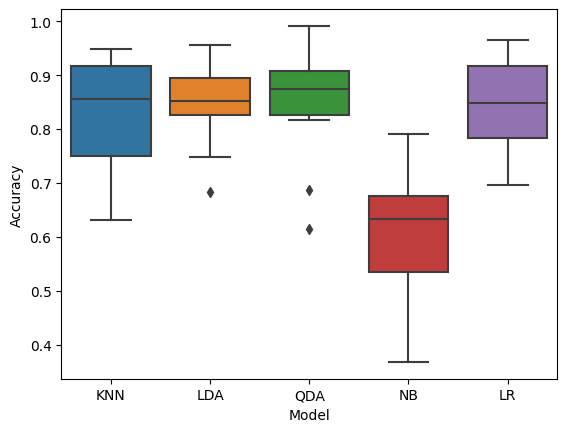

In [63]:
# Comparaison des modèles par validation croisée

plis = 10

models = [
    (KNeighborsClassifier(n_neighbors=1), "KNN"),
    (LinearDiscriminantAnalysis(), "LDA"),
    (QuadraticDiscriminantAnalysis(), "QDA"),
    (GaussianNB(), "NB"),
    (LogisticRegression(max_iter=5000), "LR"),
    #(DecisionTreeClassifier(), "DT"),
]

def validation_errors(X, Z, models):
    for model, name in models:
        for acc in cross_val_score(model, X, Z, cv=10):
            yield name, acc
            
cv_err_X1 = pd.DataFrame(validation_errors(starbucksX, starbucksZ, models), columns=["Model", "Accuracy"])
sns.boxplot(x="Model", y="Accuracy", data=cv_err_X1)

Index(['calories', 'total_fat_g', 'saturated_fat_g', 'trans_fat_g',
       'cholesterol_mg', 'sodium_mg', 'total_carbs_g', 'fiber_g', 'sugar_g',
       'caffeine_mg'],
      dtype='object')


<Axes: xlabel='Model', ylabel='Accuracy'>

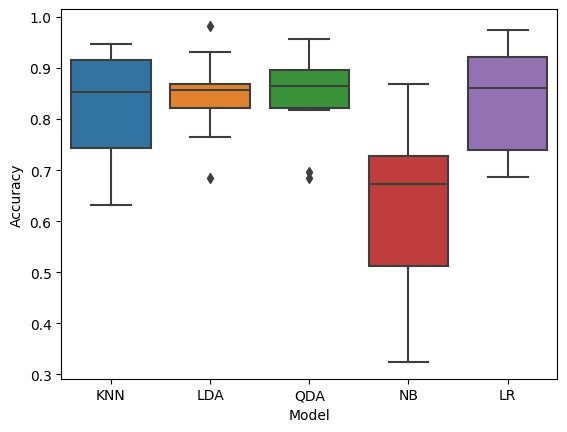

In [64]:
# On essaye d'enlever des colonnes peu importantes dans l'ACP

print(starbucksX.columns)
starbucksX2 = starbucksX.drop(columns=['total_fat_g', 'saturated_fat_g', 'trans_fat_g', 'fiber_g'])
starbucksZ2 = starbucksZ.copy()

cv_err_X2 = pd.DataFrame(validation_errors(starbucksX2, starbucksZ2, models), columns=["Model", "Accuracy"])
sns.boxplot(x="Model", y="Accuracy", data=cv_err_X2)

In [65]:
# Génération de modèles

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LR = LogisticRegression(max_iter=5000)

X_train, X_test, z_train, z_test = train_test_split(starbucksX, starbucksZ, test_size=0.33, random_state=23)

LDA.fit(X_train, z_train)
QDA.fit(X_train, z_train)
LR.fit(X_train, z_train)

z_pred_lda = LDA.predict(X_test)
z_pred_qda = QDA.predict(X_test)
z_pred_lr = LR.predict(X_test)

print("LDA : ", accuracy_score(z_pred_lda, z_test))
print("QDA : ", accuracy_score(z_pred_qda, z_test))
print("LR : ", accuracy_score(z_pred_lr, z_test))

LDA :  0.899736147757256
QDA :  0.8759894459102903
LR :  0.8970976253298153


In [66]:
# Transformations binaires

z_coffee = starbucksZ.replace("coffee", 1)
z_coffee = z_coffee.replace("tea", 0)
z_coffee = z_coffee.replace("frappuccino", 0)
z_coffee = z_coffee.replace("other", 0)
z_coffee = z_coffee.replace("chocolate", 0)

z_tea = starbucksZ.replace("tea", 1)
z_tea = z_tea.replace("coffee", 0)
z_tea = z_tea.replace("frappuccino", 0)
z_tea = z_tea.replace("other", 0)
z_tea = z_tea.replace("chocolate", 0)

z_frappuccino = starbucksZ.replace("frappuccino", 1)
z_frappuccino = z_frappuccino.replace("coffee", 0)
z_frappuccino = z_frappuccino.replace("tea", 0)
z_frappuccino = z_frappuccino.replace("other", 0)
z_frappuccino = z_frappuccino.replace("chocolate", 0)

z_chocolate = starbucksZ.replace("chocolate", 1)
z_chocolate = z_chocolate.replace("coffee", 0)
z_chocolate = z_chocolate.replace("tea", 0)
z_chocolate = z_chocolate.replace("other", 0)
z_chocolate = z_chocolate.replace("frappuccino", 0)

Z = [(z_coffee, "Coffee"), (z_tea, "Tea"), (z_frappuccino, "Frappuccino"), (z_chocolate, "Chocolate")]

--------------- Coffee
Ensemble de test :  379  avec  177   Coffee
LDA :  0.899736147757256
QDA :  0.9313984168865436
LR :  0.9050131926121372


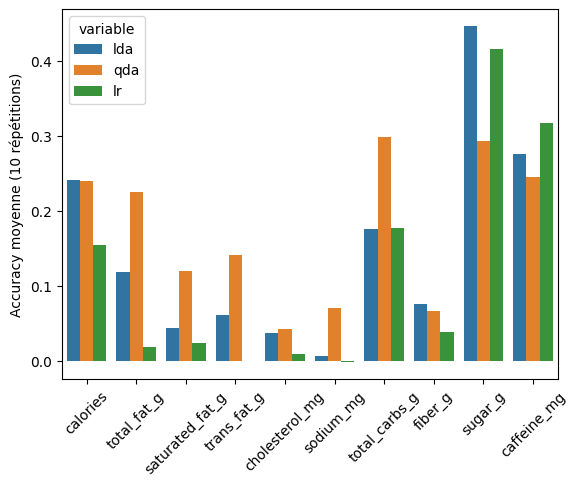

--------------- Tea
Ensemble de test :  379  avec  66   Tea
LDA :  0.8812664907651715
QDA :  0.9076517150395779
LR :  0.899736147757256


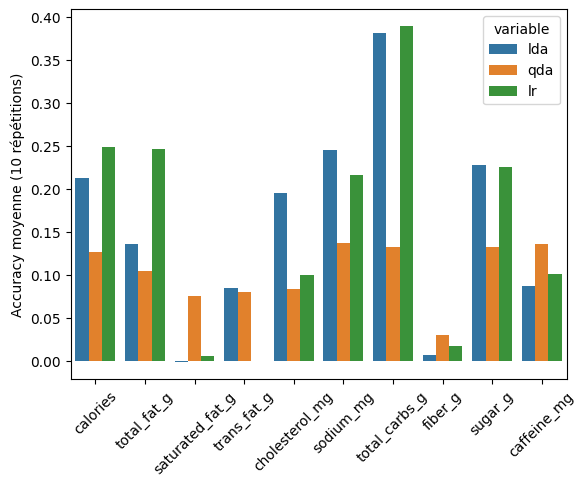

--------------- Frappuccino
Ensemble de test :  379  avec  105   Frappuccino
LDA :  0.9525065963060686
QDA :  0.9630606860158312
LR :  0.9445910290237467


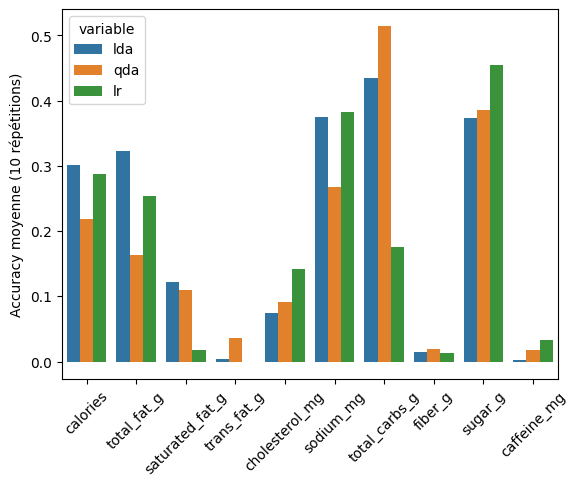

--------------- Chocolate
Ensemble de test :  379  avec  22   Chocolate
LDA :  0.9683377308707124
QDA :  1.0
LR :  0.9947229551451188


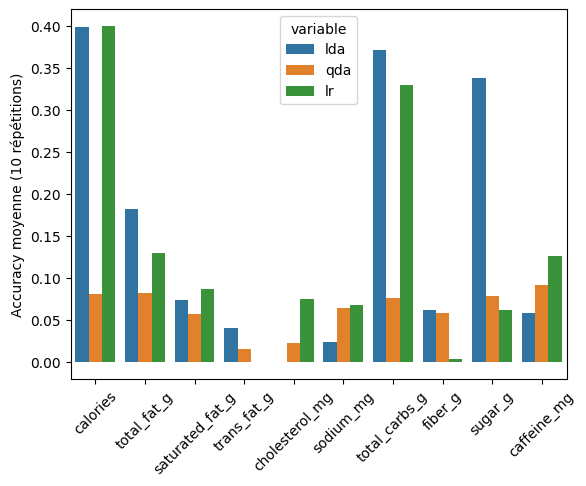

In [106]:
# Comparaison des feature importance par test de permutation

from sklearn.inspection import permutation_importance

for z in Z :
    print("---------------", z[1])
    
    X_train, X_test, z_train, z_test = train_test_split(starbucksX, z[0], test_size=0.33, random_state=23)
    colnames = starbucksX.columns
    
    LDA.fit(X_train, z_train)
    QDA.fit(X_train, z_train)
    LR.fit(X_train, z_train)

    z_pred_lda = LDA.predict(X_test)
    z_pred_qda = QDA.predict(X_test)
    z_pred_lr = LR.predict(X_test)

    print("Ensemble de test : ", len(z_test), " avec ", sum(z_test), " ", z[1])
    print("LDA : ", accuracy_score(z_pred_lda, z_test))
    print("QDA : ", accuracy_score(z_pred_qda, z_test))
    print("LR : ", accuracy_score(z_pred_lr, z_test))
    
    perm_importance_result_train_lda = permutation_importance(
        LDA, X_train, z_train, n_repeats=10
    )
    
    lda_mean = perm_importance_result_train_lda["importances_mean"]
    lda_std = perm_importance_result_train_lda["importances_std"]
    
    perm_importance_result_train_qda = permutation_importance(
        QDA, X_train, z_train, n_repeats=10
    )
    
    qda_mean = perm_importance_result_train_qda["importances_mean"]
    qda_std = perm_importance_result_train_qda["importances_std"]
    
    perm_importance_result_train_lr = permutation_importance(
        LR, X_train, z_train, n_repeats=10
    )
    
    lr_mean = perm_importance_result_train_lr["importances_mean"]
    lr_std = perm_importance_result_train_lr["importances_std"]
    
    feature_importance_mean = {
        "feature" : colnames,
        "lda" : lda_mean,
        "qda" : qda_mean,
        "lr" : lr_mean
    }
    
    feature_importance_mean = pd.DataFrame(feature_importance_mean).melt("feature")
    feature_importance_mean = feature_importance_mean.rename(columns={"value": "mean"})
    '''
    feature_importance_std = {
        "feature" : colnames,
        "lda" : lda_std,
        "qda" : qda_std,
        "lr" : lr_std
    }
    
    feature_importance_std = pd.DataFrame(feature_importance_std).melt("feature")
    feature_importance_std = feature_importance_std.rename(columns={"value": "std"})
    
    feature_importance = pd.concat([feature_importance_mean, feature_importance_std["std"]], axis = 1)
    '''
    feature_importance = feature_importance_mean
    #print(feature_importance)
    
    bp = sns.barplot(
        x="feature",
        y="mean",
        hue="variable",
        data=feature_importance
    )
    bp.set(xlabel="", ylabel="Accuracy moyenne (10 répétitions)")
    plt.xticks(rotation=45)
    plt.show()

In [68]:
print(starbucksX.columns)

Index(['calories', 'total_fat_g', 'saturated_fat_g', 'trans_fat_g',
       'cholesterol_mg', 'sodium_mg', 'total_carbs_g', 'fiber_g', 'sugar_g',
       'caffeine_mg'],
      dtype='object')
